In [1]:
import numpy as np
import splat
import wisps
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import wisps.simulations as wispsim
#the empirical luminosity function
import wisps.simulations.euclid as eucl
import astropy.units as u
from astropy.coordinates import SkyCoord

In [3]:
J1_NIPS=24 #limiting mag in NISP
J2_NIPS=27 #best case scenario

In [4]:
def get_abs_mag(spt):
    #magnitude from spt and relation
    RELH=wisps.POLYNOMIAL_RELATIONS['abs_mags']['EUCLID_H']
    absol=(RELH[0])(np.random.normal(wispsim.SPGRID, RELH[1]))

    return np.nanmean(absol)

In [5]:
spgrid=wispsim.SPGRID

In [6]:
abs_mags=np.array([get_abs_mag(s ) for s in spgrid])

In [7]:
dmaxs1=wisps.get_distance(abs_mags, np.ones_like(abs_mags)*J1_NIPS) #for 24
dmaxs2=wisps.get_distance(abs_mags, np.ones_like(abs_mags)*J2_NIPS) #for 27

In [8]:
EDFS=eucl.EUCLID_SOUTH
EDF_CH= eucl.EUCLID_NORTH

In [9]:
#compute volumes for 24 mag
EDFS_vcs1=np.array([ wispsim.custom_volume(EDFS.l.radian,EDFS.b.radian, 1., dm, 300.) for dm in dmaxs1]) #
EDF_CH_vcs1=np.array([ wispsim.custom_volume(EDF_CH.l.radian, EDF_CH.b.radian,1, dm, 300.) for dm in dmaxs1])

#compute volumes for 27 mag
EDFS_vcs2=np.array([ wispsim.custom_volume(EDFS.l.radian,EDFS.b.radian, 1., dm, 300.) for dm in dmaxs2])
EDF_CH_vcs2=np.array([ wispsim.custom_volume(EDF_CH.l.radian, EDF_CH.b.radian,1, dm,  300.) for dm in dmaxs2])

In [10]:
EDFS_CH_vols1=EDF_CH_vcs1*(20*(u.deg**2)).to(u.radian**2)
EDF_vols1=EDFS_vcs1*(10*(u.deg**2)).to(u.radian**2)

EDFS_CH_vols2=EDF_CH_vcs2*(20*(u.deg**2)).to(u.radian**2)
EDF_vols2=EDFS_vcs2*(10*(u.deg**2)).to(u.radian**2)

In [11]:
def get_numbers( model, h=300, field='fornax'):
    ds=eucl.expected_numbers(model, field=field, h=h)
    simdf=pd.DataFrame.from_records(ds)
    cutdf=(simdf[simdf.h.between(0, 24) & simdf.j.between(0, 24)]).reset_index(drop=True)
    
    NORM = 0.63*(10**-3)/ len(cutdf.teff[np.logical_and(cutdf.teff>=1650, cutdf.teff <=1800)])
    
    NSIM=dict(zip(wispsim.SPGRID,np.zeros(len(wispsim.SPGRID))))
    #rounded spectral type
    
    cutdf['spt_r']=cutdf.spt.apply(np.round)
    for g in cutdf.groupby('spt_r'):
        NSIM[g[0]]=np.nansum((g[1]).prob*NORM)
    return NSIM

In [12]:

n_south_brf=get_numbers('baraffe2003', h=300, field='south')
n_south_marl=get_numbers('marley2019', h=300, field='south')
n_south_phil=get_numbers('phillips2020', h=300, field='south')
n_south_saum=get_numbers('saumon2008', h=300, field='south')

(300000,)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:02<00:00, 1875.95draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:02<00:00, 1600.99draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:03<00:00, 1269.41draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:02<00:00, 1478.98draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:02<00:00, 1934.35draws/s]
The number of effective samples i

(300000,)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3601.51draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3430.07draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3548.68draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3121.17draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3275.26draws/s]
The number of effective samples i

(120000,)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:02<00:00, 1747.29draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2851.95draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2792.38draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2763.61draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2839.40draws/s]
The number of effective samples i

(300000,)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:02<00:00, 2012.09draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:02<00:00, 1804.26draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3011.68draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2265.97draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2254.13draws/s]
The number of effective samples i

In [13]:

n_forn_brf=get_numbers('baraffe2003', h=300, field='north')
n_forn_marl=get_numbers('marley2019', h=300, field='north')
n_forn_phil=get_numbers('phillips2020', h=300, field='north')
n_forn_saum=get_numbers('saumon2008', h=300, field='north')

(300000,)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2498.64draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:03<00:00, 1297.81draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:02<00:00, 1702.10draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:05<00:00, 788.50draws/s] 
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2723.79draws/s]
The number of effective samples i

(300000,)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2997.10draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3966.22draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3576.73draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3614.21draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2747.29draws/s]
The number of effective samples i

(120000,)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3182.05draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3110.90draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2292.45draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3063.98draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 2632.97draws/s]
The number of effective samples i

(300000,)


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3998.14draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:00<00:00, 4222.75draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3573.00draws/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3741.38draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [d]
Sampling 4 chains: 100%|██████████| 4200/4200 [00:01<00:00, 3549.98draws/s]
The number of effective

In [14]:
import seaborn as sns
sns.set_palette(sns.color_palette('tab10', 20))

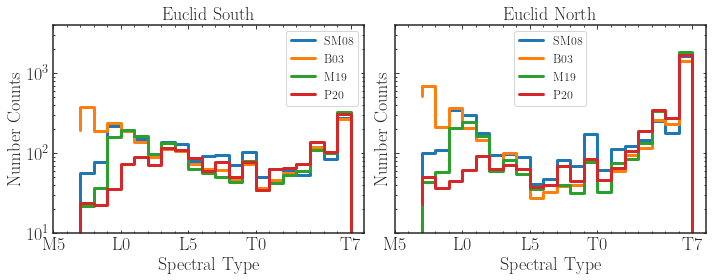

In [18]:
fig, (ax, ax1)=plt.subplots(ncols=2, figsize=(10, 4), sharey=True, sharex=False)

ax.step(spgrid, np.array([n_south_saum[k] for k in wispsim.SPGRID])*EDFS_CH_vols1, label='SM08', linewidth=3)
ax.step(spgrid, np.array([n_south_brf[k] for k in wispsim.SPGRID])*EDFS_CH_vols1, label='B03', linewidth=3)
ax.step(spgrid, np.array([n_south_marl[k] for k in wispsim.SPGRID])*EDFS_CH_vols1, label='M19', linewidth=3)
ax.step(spgrid, np.array([n_south_phil[k] for k in wispsim.SPGRID])*EDFS_CH_vols1, label='P20', linewidth=3)

ax1.step(spgrid, np.array([n_forn_saum[k] for k in wispsim.SPGRID])*EDFS_CH_vols1, label='SM08', linewidth=3)
ax1.step(spgrid, np.array([n_forn_brf[k] for k in wispsim.SPGRID])*EDFS_CH_vols1, label='B03', linewidth=3)
ax1.step(spgrid, np.array([n_forn_marl[k] for k in wispsim.SPGRID])*EDFS_CH_vols1, label='M19', linewidth=3)
ax1.step(spgrid, np.array([n_forn_phil[k] for k in wispsim.SPGRID])*EDFS_CH_vols1, label='P20', linewidth=3)

ax.set_title(r'Euclid South', fontsize=18)
ax1.set_title(r'Euclid North', fontsize=18)

for a in [ax, ax1]:
    a.minorticks_on()
    
    a.legend()
    a.set_yscale('log')

    a.set_ylabel(r'Number Counts', fontsize=18)
    a.set_xticks([15, 20, 25, 30, 37])
    a.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T7'])
    a.set_xlim([15, 38])


ax.set_ylim([10, 4000])
ax.set_xlabel('Spectral Type', fontsize=18)
ax1.set_xlabel('Spectral Type', fontsize=18)


plt.tight_layout()


plt.savefig(wisps.OUTPUT_FIGURES+'/euclid_predictions.pdf')

In [16]:
eucl.EUCLID_NORTH

<SkyCoord (Galactic): (l, b) in deg
    (124.97968858, 3.76004187)>